In [13]:
import tensorflow as tf
import numpy as np
import os

In [14]:
os.chdir("D:\\Downloads\\")
from preprocessed_mnist import load_dataset

# load 'mnist' dataset of handwritten images (https://keras.io/datasets/)
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


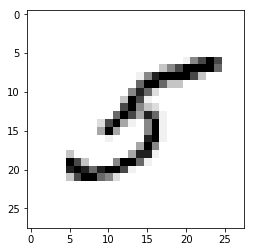

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[35], cmap="Greys")

# Logistic regression


In [17]:
s = tf.Session()

# Reload dataset with features in flat format
X_train_flat, y_train, X_val_flat, y_val, X_test_flat, y_test = load_dataset(flatten=True)

# Categorical labels to binaries
y_train_oh = s.run(tf.one_hot(y_train, 10))
y_test_oh  = s.run(tf.one_hot(y_test, 10))
y_val_oh   = s.run(tf.one_hot(y_val, 10))

In [18]:
# Model parameters - weights and bias
nhid   = 50
nclass = len(np.unique(y_train))
weights_hid = tf.Variable(tf.random_normal([X_train_flat.shape[1], nhid], stddev=0.35),
                      name="weights_h") 

b_hid = tf.Variable(tf.zeros([nhid]), dtype='float32', name="biases_h")

weights_out = tf.Variable(tf.random_normal([nhid, nclass], stddev=0.35),
                      name="weights") 

b_out = tf.Variable(tf.zeros([nclass]), dtype='float32', name="biases")

# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,X_train_flat.shape[1]))
input_y = tf.placeholder('float32', shape=(None, nclass))
input_X, input_y, weights_hid, weights_out, b_hid, b_out

(<tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_3:0' shape=(?, 10) dtype=float32>,
 <tf.Variable 'weights_h_1:0' shape=(784, 50) dtype=float32_ref>,
 <tf.Variable 'weights_1:0' shape=(50, 10) dtype=float32_ref>,
 <tf.Variable 'biases_h_1:0' shape=(50,) dtype=float32_ref>,
 <tf.Variable 'biases_1:0' shape=(10,) dtype=float32_ref>)

In [19]:
# model
#predicted_y =  tf.nn.softmax(tf.matmul(input_X, weights)+b)
predicted_y_hid =  tf.nn.relu(tf.matmul(input_X, weights_hid)+b_hid)
predicted_y     =  tf.matmul(predicted_y_hid, weights_out)+b_out

# Loss. Should be a scalar number - average loss over all the objects
#loss = tf.reduce_mean(-tf.reduce_sum(tf.log(predicted_y+1e-07)*input_y, reduction_indices=[1]))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=predicted_y))

# See above for an example. tf.train.*Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(
    loss, var_list=(weights_hid, b_hid, weights_out, b_out))

# compute accuracy
correct_prediction = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
from sklearn.metrics import roc_auc_score

trainloss = list()
testloss  = list()
acctrain  = list()
acctest   = list()
s.run(tf.global_variables_initializer())


# run optimizing iterations
for i in range(400):
    #batchX, batchY = s.run(tf.train.batch([X_train_flat, y_train_oh],100,enqueue_many=True, capacity=1))
    s.run(optimizer, {input_X: X_train_flat, input_y: y_train_oh})
    #s.run(optimizer, {input_X: batchX, input_y: batchY})
    loss_i = s.run(loss, {input_X: X_train_flat, input_y: y_train_oh})
    trainloss.append(loss_i)
    loss_i = s.run(loss, {input_X: X_test_flat, input_y: y_test_oh})
    testloss.append(loss_i)
    acctrain.append(s.run(accuracy, feed_dict={input_X:X_train_flat, input_y: y_train_oh}))
    acctest.append(s.run(accuracy, feed_dict={input_X:X_test_flat, input_y: y_test_oh}))
    print("loss at iter %i:%.4f" % (i, loss_i))
    print("train auc:", roc_auc_score(y_train_oh, s.run(predicted_y, {input_X:X_train_flat})))
    print("test auc:", roc_auc_score(y_test_oh, s.run(predicted_y, {input_X:X_test_flat})))

loss at iter 0:6.2919
train auc: 0.58335591091
test auc: 0.587046529894
loss at iter 1:3.6300
train auc: 0.680346819807
test auc: 0.684605617402
loss at iter 2:2.1468
train auc: 0.717883381394
test auc: 0.723069321929
loss at iter 3:1.8736
train auc: 0.745649948611
test auc: 0.750616156593
loss at iter 4:1.7157
train auc: 0.76964637616
test auc: 0.77449417062
loss at iter 5:1.5911
train auc: 0.791106008856
test auc: 0.795901123492
loss at iter 6:1.4846
train auc: 0.809992785558
test auc: 0.814772644749
loss at iter 7:1.3906
train auc: 0.826191377866
test auc: 0.830987511265
loss at iter 8:1.3072
train auc: 0.840029531966
test auc: 0.844736250014
loss at iter 9:1.2328
train auc: 0.851826060772
test auc: 0.856468604758
loss at iter 10:1.1671
train auc: 0.861823558819
test auc: 0.866409542765
loss at iter 11:1.1089
train auc: 0.870376151842
test auc: 0.874892079164
loss at iter 12:1.0569
train auc: 0.877674946403
test auc: 0.882179540103
loss at iter 13:1.0105
train auc: 0.883922416177
te

train auc: 0.950582928285
test auc: 0.953115404124
loss at iter 112:0.3802
train auc: 0.950692471162
test auc: 0.953216606926
loss at iter 113:0.3793
train auc: 0.950815426362
test auc: 0.95332775458
loss at iter 114:0.3780
train auc: 0.950920196996
test auc: 0.953422903917
loss at iter 115:0.3771
train auc: 0.951041040743
test auc: 0.953531392824
loss at iter 116:0.3758
train auc: 0.951141937272
test auc: 0.953625936927
loss at iter 117:0.3749
train auc: 0.951259661168
test auc: 0.953732300487
loss at iter 118:0.3737
train auc: 0.951357446892
test auc: 0.953823452939
loss at iter 119:0.3729
train auc: 0.951473923126
test auc: 0.953925390052
loss at iter 120:0.3717
train auc: 0.951568132255
test auc: 0.954011289046
loss at iter 121:0.3709
train auc: 0.951680903071
test auc: 0.954115455867
loss at iter 122:0.3697
train auc: 0.951771726001
test auc: 0.954196805971
loss at iter 123:0.3689
train auc: 0.951884936448
test auc: 0.954297921269
loss at iter 124:0.3677
train auc: 0.95197304163
t

loss at iter 221:0.3087
train auc: 0.959253206884
test auc: 0.960905992093
loss at iter 222:0.3082
train auc: 0.959295702902
test auc: 0.960944599323
loss at iter 223:0.3079
train auc: 0.959343057482
test auc: 0.960986993086
loss at iter 224:0.3074
train auc: 0.959385639704
test auc: 0.961024915418
loss at iter 225:0.3071
train auc: 0.959431708649
test auc: 0.961065271162
loss at iter 226:0.3066
train auc: 0.959473443925
test auc: 0.961103120236
loss at iter 227:0.3063
train auc: 0.959519069873
test auc: 0.961141522756
loss at iter 228:0.3059
train auc: 0.959559890655
test auc: 0.961177503132
loss at iter 229:0.3055
train auc: 0.959605081027
test auc: 0.961217869777
loss at iter 230:0.3051
train auc: 0.95964604679
test auc: 0.9612541784
loss at iter 231:0.3047
train auc: 0.959691667263
test auc: 0.961296191892
loss at iter 232:0.3043
train auc: 0.959732803608
test auc: 0.961333271566
loss at iter 233:0.3040
train auc: 0.959778027615
test auc: 0.961372798121
loss at iter 234:0.3036
trai

loss at iter 331:0.2749
train auc: 0.963244418456
test auc: 0.964462370481
loss at iter 332:0.2743
train auc: 0.963254265271
test auc: 0.964476475928
loss at iter 333:0.2744
train auc: 0.963300755454
test auc: 0.964511875751
loss at iter 334:0.2738
train auc: 0.963309828187
test auc: 0.964526598573
loss at iter 335:0.2740
train auc: 0.963356910346
test auc: 0.964561645599
loss at iter 336:0.2734
train auc: 0.963365628516
test auc: 0.964577418594
loss at iter 337:0.2735
train auc: 0.963413066279
test auc: 0.964612466721
loss at iter 338:0.2729
train auc: 0.963420731015
test auc: 0.964626784593
loss at iter 339:0.2730
train auc: 0.963468529877
test auc: 0.964659821422
loss at iter 340:0.2724
train auc: 0.96347587959
test auc: 0.964676183169
loss at iter 341:0.2726
train auc: 0.963524530786
test auc: 0.964710675912
loss at iter 342:0.2719
train auc: 0.963530965969
test auc: 0.964727245809
loss at iter 343:0.2721
train auc: 0.963580360104
test auc: 0.964762796777
loss at iter 344:0.2715
tr

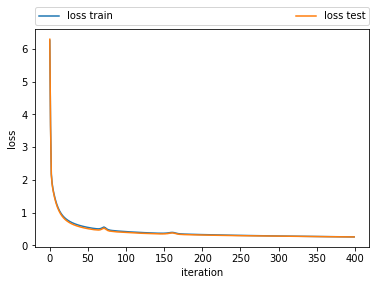

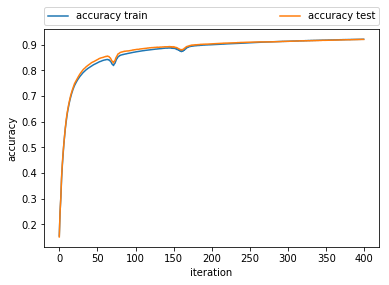

In [21]:
plt.plot(trainloss, label = "loss train")
plt.plot(testloss, label="loss test")
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

plt.plot(acctrain, label = "accuracy train")
plt.plot(acctest, label  = "accuracy test")
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


In [22]:
correct_prediction = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy on train data:", s.run(accuracy, feed_dict={input_X:X_train_flat, input_y: y_train_oh}))
print("Accuracy on val data:"  , s.run(accuracy, feed_dict={input_X:X_val_flat, input_y: y_val_oh}))
print("Accuracy on test data:" , s.run(accuracy, feed_dict={input_X:X_test_flat, input_y: y_test_oh}))

Accuracy on train data: 0.92158
Accuracy on val data: 0.9311
Accuracy on test data: 0.9208
